In [105]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [116]:
img = cv.imread("lenna.png")
img

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [115]:
def bgr2rgb(img_array):
    img_rgb = img_array.copy()
    img_rgb[:, :, 0] = img[:, :,2]
    img_rgb[:, :, 2] = img[:, :, 0]
    return img_rgb

bgr2rgb(img)

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [117]:
def apply_filter(source, kernel):
    new_image = cv.filter2D(source, -1, kernel)
    print("New image shape: ", new_image.shape)
    if len(source.shape) == 3:
        return bgr2rgb(new_image)
    else:
        return new_image

def compare_original_img(img_original, img_filtered, label):
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.imshow(img_original)
    ax1.set_title("Original Image")
    ax1.axis("off")
    
    ax2.imshow(img_filtered)
    ax2.set_title(label)
    ax2.axis("off")

New image shape:  (512, 512, 3)


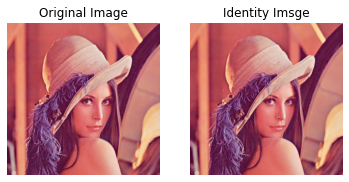

In [121]:
# Identity

identity_kernel = np.array([[0,0,0],
                            [0,1,0],
                            [0,0,0]])

img_identity = apply_filter(img, identity_kernel)
compare_original_img(bgr2rgb(img), img_identity, label="Identity Imsge")


New image shape:  (512, 512, 3)


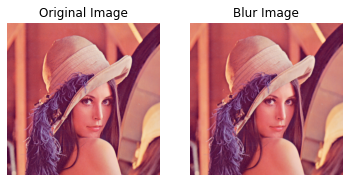

In [123]:
blur_kernel = np.ones((3,3), np.float32) / 9

blur_img = apply_filter(img, blur_kernel)
compare_original_img(bgr2rgb(img), blur_img, label="Blur Image")

New image shape:  (512, 512, 3)


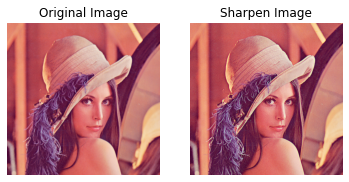

In [124]:
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img_sharpen = apply_filter(img, sharpen_kernel)
compare_original_img(bgr2rgb(img), img_sharpen, label="Sharpen Image")

In [125]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_img

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

New image shape:  (512, 512)


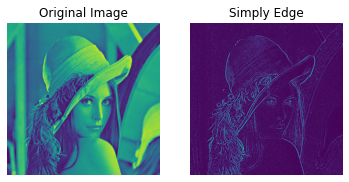

In [126]:
# Simple Edge detection
simply_edge_kernel = np.array([[-1,-1,-1],
                               [-1,8,-1],
                               [-1,-1,-1]])

simply_edge_img = apply_filter(gray_img, simply_edge_kernel)
compare_original_img(gray_img, simply_edge_img, label="Simply Edge")

New image shape:  (512, 512)


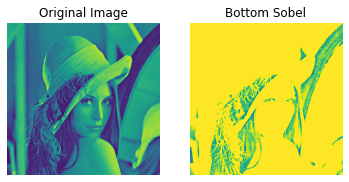

In [127]:
bottom_sobel_kernel = np.array([[-1,2,-1],
                                 [0,0,0],
                                 [1,2,1]])

bottom_sobel_img = apply_filter(gray_img, bottom_sobel_kernel)
compare_original_img(gray_img, bottom_sobel_img, label="Bottom Sobel")

New image shape:  (512, 512)


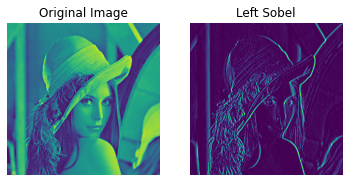

In [128]:
left_sobel_kernel = np.array([[1,0,-1],
                            [2,0,-2],
                            [1,0,-1]])

left_sobel_img = apply_filter(gray_img, left_sobel_kernel)
compare_original_img(gray_img, left_sobel_img, label="Left Sobel")

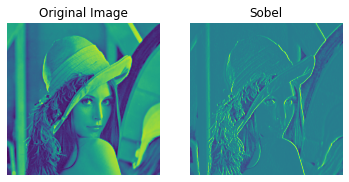

In [133]:
sobel = left_sobel_img/2 + bottom_sobel_img/2
compare_original_img(gray_img, sobel, label="Sobel")